In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
X_full = data.data          # all 30 features for full clustering
X_plot = data.data[:, :2]   # 2 features for 2D visualization

# Part 1: Implementation of K - means clusting

In [4]:
def kmeans(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    # Initialize centroids randomly
    idx = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[idx]

    for _ in range(max_iters):
        # Assign points to nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.allclose(new_centroids, centroids, atol=tol):
            break

        centroids = new_centroids

    return centroids, labels

# Part 2: Run k-means for k = 2 to 7

In [6]:
ks = range(2, 8)
distortions = []

print("\n--- Running k-means for k = 2 to 7 ---")
for k in ks:
    centroids, labels = kmeans(X_full, k)
    # Compute distortion
    d = sum(np.sum((X_full[labels == i] - centroids[i])**2) for i in range(k))
    distortions.append(d)
    print(f"Inputs to k-means: X.shape={X_full.shape}, k={k}, max_iters=100 | Distortion={d:.2f}")



--- Running k-means for k = 2 to 7 ---
Inputs to k-means: X.shape=(569, 30), k=2, max_iters=100 | Distortion=77943099.88
Inputs to k-means: X.shape=(569, 30), k=3, max_iters=100 | Distortion=47499852.23
Inputs to k-means: X.shape=(569, 30), k=4, max_iters=100 | Distortion=29226541.65
Inputs to k-means: X.shape=(569, 30), k=5, max_iters=100 | Distortion=20672701.39
Inputs to k-means: X.shape=(569, 30), k=6, max_iters=100 | Distortion=17126362.59
Inputs to k-means: X.shape=(569, 30), k=7, max_iters=100 | Distortion=13351179.88


# Part 3 -  Plot distortion vs k

k=2, distortion=77943099.88
k=3, distortion=47499852.23
k=4, distortion=29226541.65
k=5, distortion=20672701.39
k=6, distortion=17126362.59
k=7, distortion=13351179.88


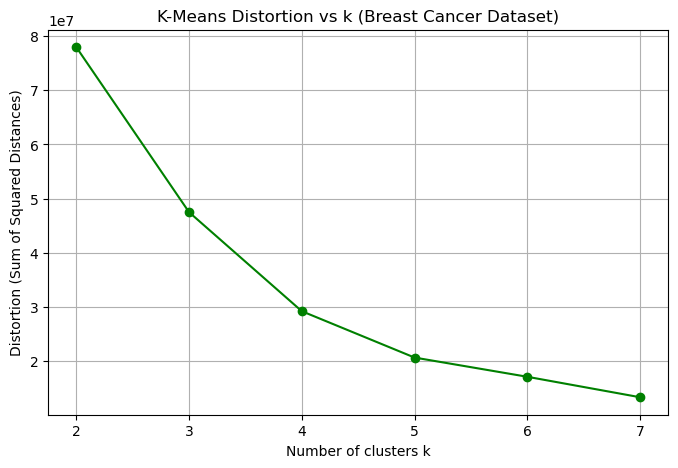

In [8]:
ks = range(2, 8)  # k = 2, 3, 4, 5, 6, 7
distortions = []

for k in ks:
    centroids, labels = kmeans(X_full, k)
    # Compute distortion: sum of squared distances to cluster centroids
    d = sum(np.sum((X_full[labels == i] - centroids[i])**2) for i in range(k))
    distortions.append(d)
    print(f"k={k}, distortion={d:.2f}")

# Plot the distortion vs k
plt.figure(figsize=(8,5))
plt.plot(ks, distortions, marker='o', linestyle='-', color='green')

plt.xlabel("Number of clusters k")
plt.ylabel("Distortion (Sum of Squared Distances)")
plt.title("K-Means Distortion vs k (Breast Cancer Dataset)")
plt.grid(True)
plt.show()

# Part - 4 Iteration wise visulization for k=2 to k=7 (2D)


--- Iteration-wise visualization for k=2 ---


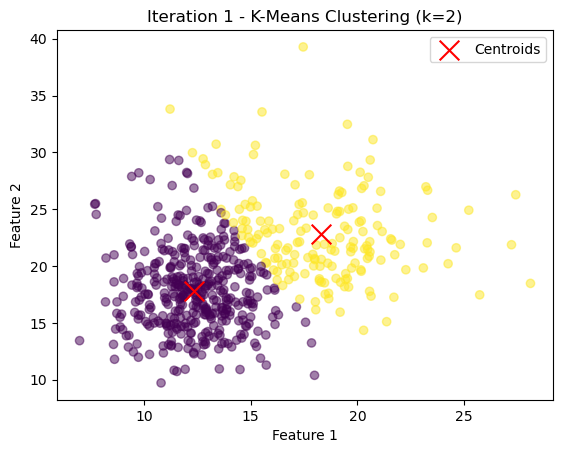

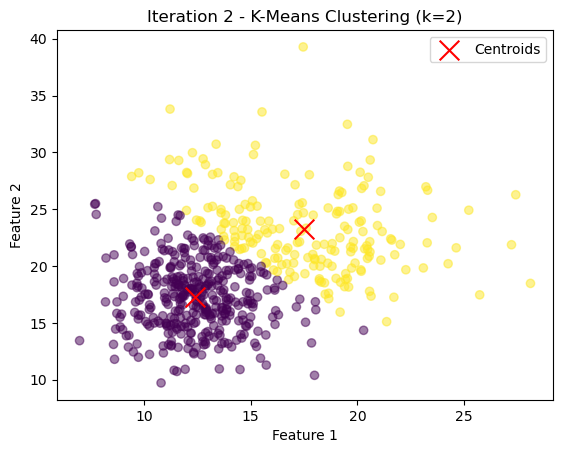

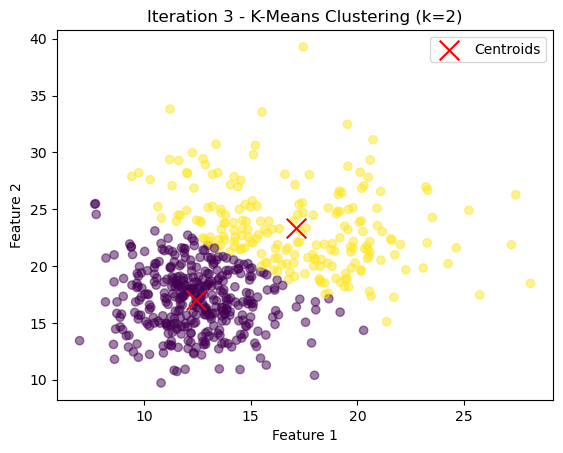

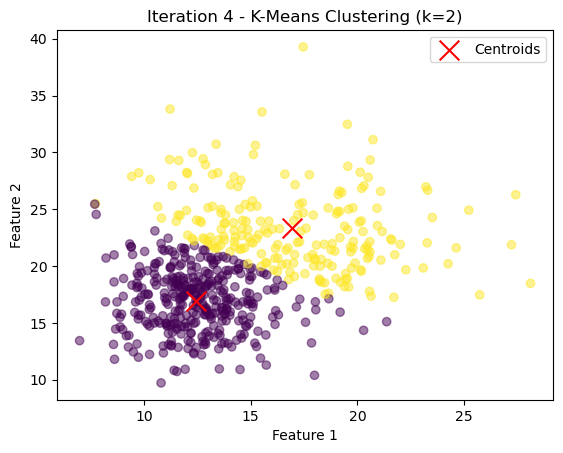

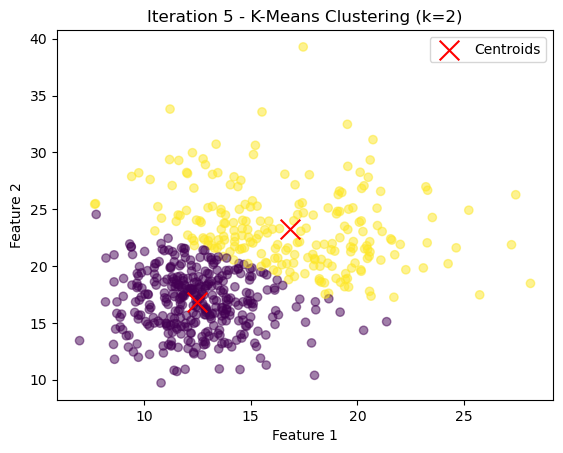

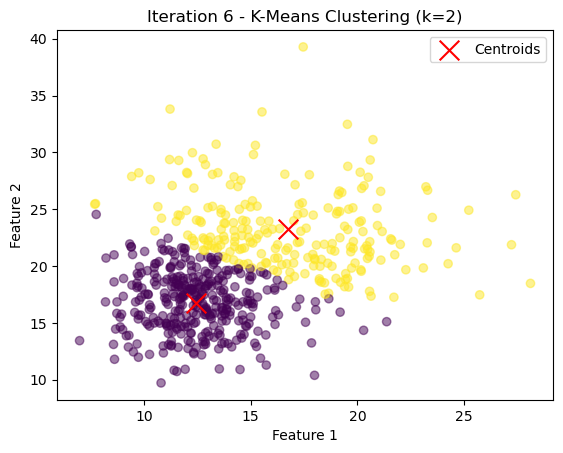

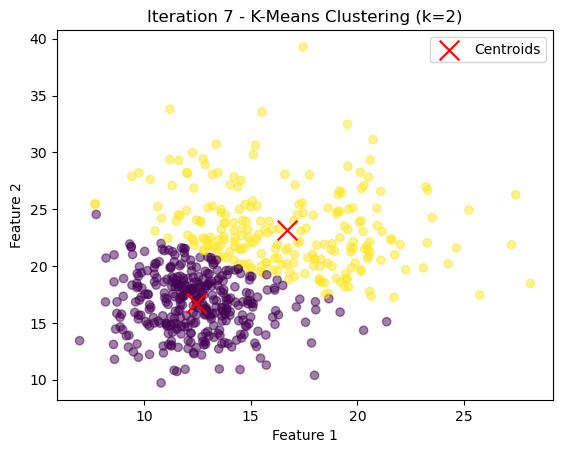

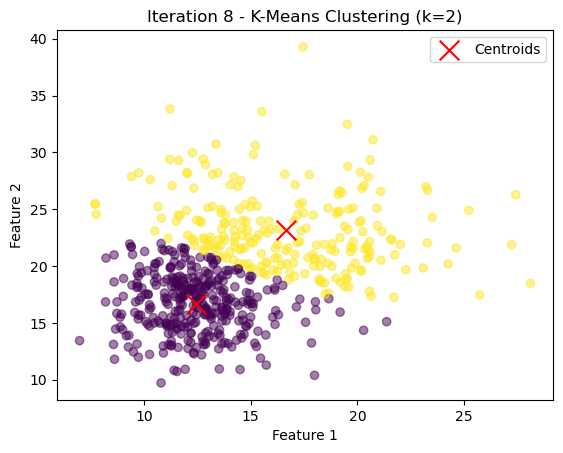

Converged at iteration 9


In [9]:
k_visual = 2
max_iters_visual = 10

# Randomly select k points as initial centroids
np.random.seed(42)
centroids = X_plot[np.random.choice(X_plot.shape[0], k_visual, replace=False)]

print("\n--- Iteration-wise visualization for k=2 ---")

for iter_num in range(max_iters_visual):
    # Step 1: Compute distance from each point to each centroid
    distances = np.sqrt(((X_plot[:, None, :] - centroids[None, :, :]) ** 2).sum(axis=2))
    
    # Step 2: Assign each point to the nearest centroid
    labels = np.argmin(distances, axis=1)
    
    # Step 3: Compute new centroids as mean of assigned points
    new_centroids = np.array([X_plot[labels == i].mean(axis=0) for i in range(k_visual)])
    
    # Step 4: Check if centroids have changed (convergence)
    if np.allclose(new_centroids, centroids):
        print(f"Converged at iteration {iter_num + 1}")
        centroids = new_centroids
        break
    
    # Update centroids for next iteration
    centroids = new_centroids
    
    # Step 5: Plot current clusters and centroids
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(f'Iteration {iter_num + 1} - K-Means Clustering (k=2)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Best k choice
## -> Based on the distortion plot and elbow method, the best k = 2
## -> Because this dataset has 2 kind of data like cancerous person and non-cancerous person so if we take k > 2 that makes no sense because it make the more cluster but there is no logic behind it.
## -> Justification: Captures the underlying class structure, and further increasing k doesn’t significantly reduce distortion.